# Feature Extraction for classical ML
---
---

## Imports and Paths
---

In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
PREPROCESSED_DIR = os.path.join(BASE_DIR, "preprocessed")
FEATURES_DIR = os.path.join(BASE_DIR, "extracted_features")

os.makedirs(FEATURES_DIR, exist_ok=True)

print(BASE_DIR)
print(PREPROCESSED_DIR)
print(FEATURES_DIR)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/preprocessed
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/extracted_features


In [3]:
import pandas as pd


from src.classical_ml import FeatureExtractor

## Feature Extraction
---

To extract features i created the class `FeatureExtractor`. This class extracs several features from each image, in parallel, to speed things up.

The extracted features are:
- __General statistics__
    - `mean`
    - `median`
    - `std`
    - `entropy`
    - `energy`
- __Histogram statistics__  
using bins with size 50 (i.e. intensities [0-50], [51-100], ..., [201-250]), take:
    - `mean`
    - `std`
- __Otsu's threshold__  
The intensity value that best separates the pixels in two classe, determined by minimizing intra-class variance.
- __Number of edges__  
The number of edges in the image, based on two user defined thresholds.
- __Number of horizontal and vertical lines__  
Using the edges of the images, and again specified using user defined thresholds.
- __Fast Furier Transofrm (FFT) features__  
Computes the FFT of the image and based on the magnitute spectrum extracts:
    - `mean`
    - `std`
- __Fractal dimension__  
Calculates the fractal dimension of the image using the box-counting method.
- __Hu's invariant moments__  
These are seven moments extracted from the image that are invariant with respect to translation, scale, and rotation.

In [4]:
extractor = FeatureExtractor()
df = extractor.parallel_extract_features(PREPROCESSED_DIR)

Found 8546 images to process.


Extracting Features: 100%|██████████| 8546/8546 [00:24<00:00, 344.87images/s]


The features are stored as a `.csv` file.

In [5]:
df.to_csv(os.path.join(FEATURES_DIR, "features.csv"), index=False)
df

label        mean  median        std       entropy     energy  \
0         0  126.398537   132.0  60.092009 -4.555590e+07  5241441.0   
1         0  125.405851   140.0  63.497017 -4.554596e+07  4792512.0   
2         0  120.794165   141.0  67.317081 -4.392547e+07  4561312.0   
3         0  116.016841   119.0  59.557122 -4.133231e+07  5084107.0   
4         0   86.335559    92.0  32.824811 -2.845725e+07  5155379.0   
...     ...         ...     ...        ...           ...        ...   
8541      1  130.349111   140.0  50.875076 -4.694415e+07  5130027.0   
8542      1  127.927495   149.0  60.651631 -4.639670e+07  5088416.0   
8543      1   89.125279    82.0  50.481511 -3.007664e+07  5551838.0   
8544      1  116.759766   124.0  62.093815 -4.186160e+07  4803330.0   
8545      1  107.041414   114.0  50.539861 -3.720438e+07  5452750.0   

      hist_means_0_50  hist_means_51_100  hist_means_101_150  \
0            0.002406           0.004322            0.005324   
1            0.003123           0.002722            0.005337   
2            0.004046           0.002294            0.004607   
3            0.003063           0.004710            0.005412   
4            0.002527           0.009614            0.007808   
...               ...                ...                 ...   
8541         0.001754           0.002806            0.006673   
8542         0.003073           0.002463            0.004570   
8543         0.005394           0.006468            0.004616   
8544         0.003321           0.003828            0.005918   
8545         0.003280           0.005094            0.006422   

      hist_means_151_200  ...     fft_mean       fft_std  fractal_dim  \
0               0.005564  ...  4637.846032  31005.157525     3.618476   
1               0.007193  ...  2947.064687  31348.321195     3.595110   
2               0.008389  ...  2714.319568  30856.750660     3.623852   
3               0.005585  ...  3156.278588  29040.988903     3.499667   
4               0.000015  ...  2004.753150  20592.409276     2.616897   
...                  ...  ...          ...           ...          ...   
8541            0.008547  ...  3804.077929  31111.623714     3.664027   
8542            0.009475  ...  2136.334621  31641.223908     3.609620   
8543            0.003519  ...  2016.021638  22855.351906     3.261111   
8544            0.005532  ...  4607.659607  29262.120274     3.593687   
8545            0.005195  ...  1817.038754  26453.196407     3.431292   

      hu_moment_1   hu_moment_2   hu_moment_3   hu_moment_4   hu_moment_5  \
0        0.001203  3.762364e-08  8.234124e-12  8.043671e-12 -4.697805e-24   
1        0.001135  3.485145e-08  1.000236e-11  2.558146e-12  1.215167e-23   
2        0.001080  7.982280e-08  6.449595e-12  5.946443e-12 -3.464027e-23   
3        0.001274  9.745192e-08  9.770028e-13  4.685898e-12 -8.984335e-24   
4        0.001724  7.765126e-08  3.585046e-11  8.124226e-13 -3.501637e-24   
...           ...           ...           ...           ...           ...   
8541     0.001147  3.322886e-08  1.250835e-11  2.685833e-12 -1.717028e-24   
8542     0.001076  6.994984e-08  7.687660e-12  6.941840e-13 -1.553947e-24   
8543     0.001459  9.205449e-08  3.170139e-11  3.938320e-11 -1.357030e-21   
8544     0.001190  6.827172e-08  2.940628e-11  1.521368e-11 -3.204340e-22   
8545     0.001249  6.258703e-08  2.743078e-12  1.280906e-11 -3.827175e-23   

       hu_moment_6   hu_moment_7  
0     7.887081e-16 -6.529335e-23  
1     2.547347e-16  4.447964e-24  
2     1.581637e-15 -1.249763e-23  
3     1.462809e-15 -4.450484e-24  
4     1.711871e-16 -2.638637e-24  
...            ...           ...  
8541 -4.881391e-16  1.547251e-23  
8542 -9.274301e-17 -3.961523e-25  
8543  1.064386e-14  3.081279e-22  
8544  3.947129e-15 -2.950230e-23  
8545  3.197101e-15  6.557549e-23  

[8546 rows x 30 columns]

## Feature Inspection
---

In [6]:
from src.utils import get_correlations, get_correlations_pair_matrix, dim_red
from src.visualizations import plot_correlation_coefficients, heatmap_correlations, pairplot

In [7]:
target = df.pop("label")
target

0       0
1       0
2       0
3       0
4       0
       ..
8541    1
8542    1
8543    1
8544    1
8545    1
Name: label, Length: 8546, dtype: int64

We can see that some features are highly correlated with the target value, namely `n_edges`, `vertical_lines`, `hist_std_151_200`, and `fft_mean` all have correlations higher than 0.5.

In [8]:
plot_correlation_coefficients(get_correlations(df, target))

The intra-feature correlation heatmap shows that our data set might have some redundant info, hence the high correlations between some features.

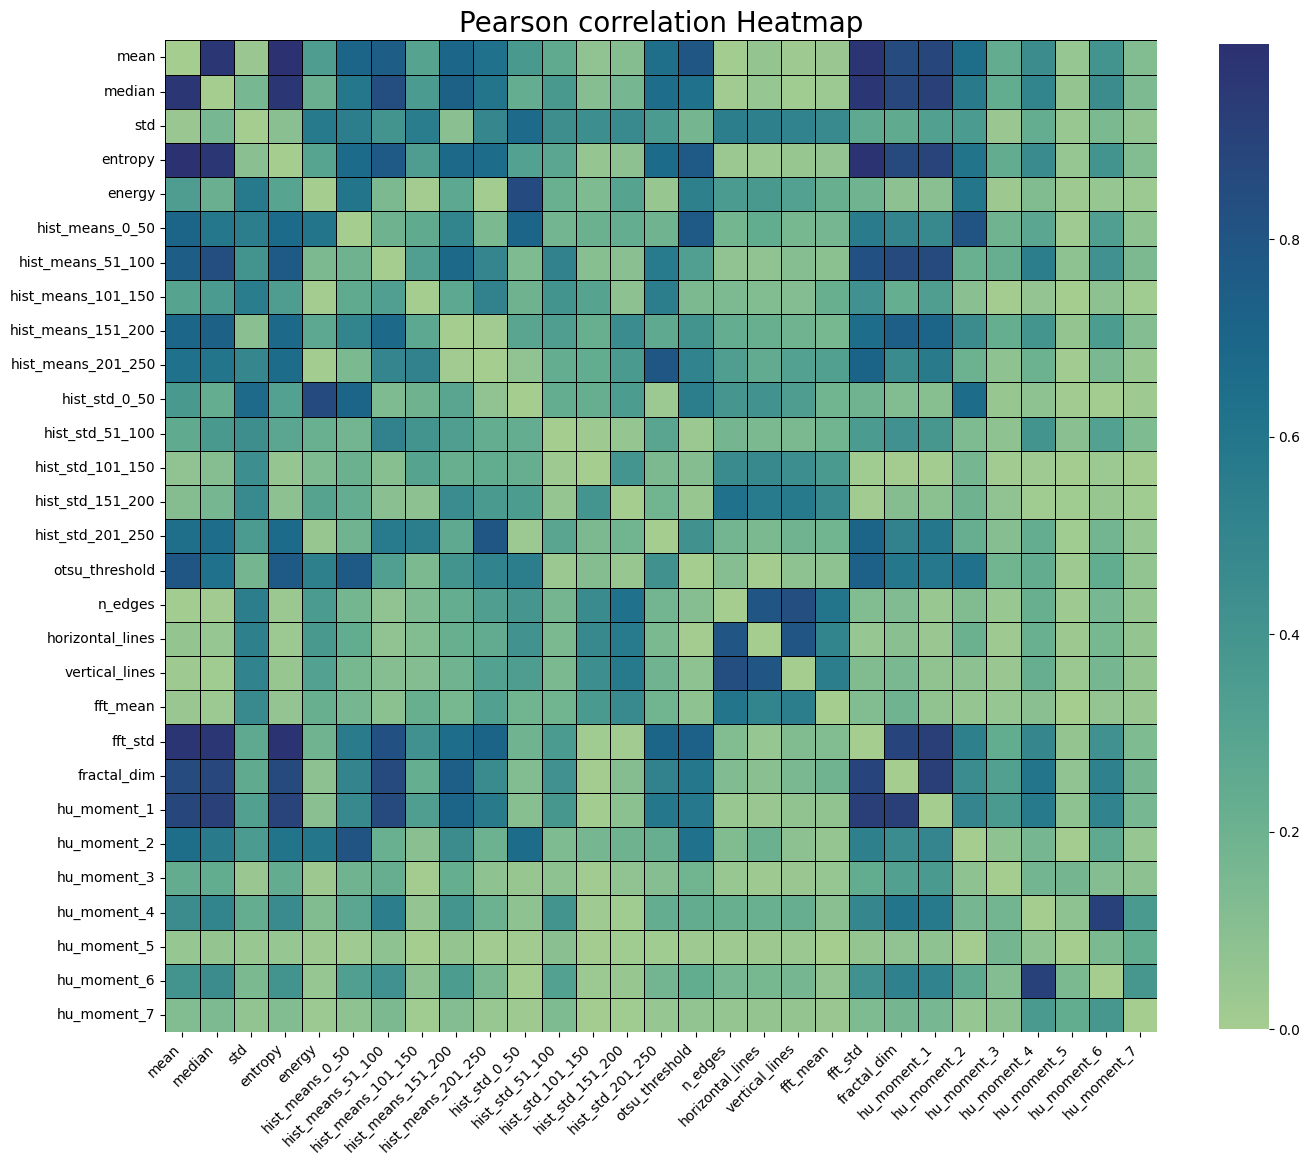

In [9]:
heatmap_correlations(get_correlations_pair_matrix(df), labels=df.columns)

Using `PCA`, `t-SNE`, and `UMAP` for dimensionality reduction we can see if the two classes will be easily separated. By using a pairplot we can investigate all the combinations of the first dimensions, for example we can see that _PC1_ and _PC4_ manage to separate (at least visually) the two classes up to some degree, t-SNE seems to form something like a hyperdimensional coil, and UMAP results in an even more complex shape.

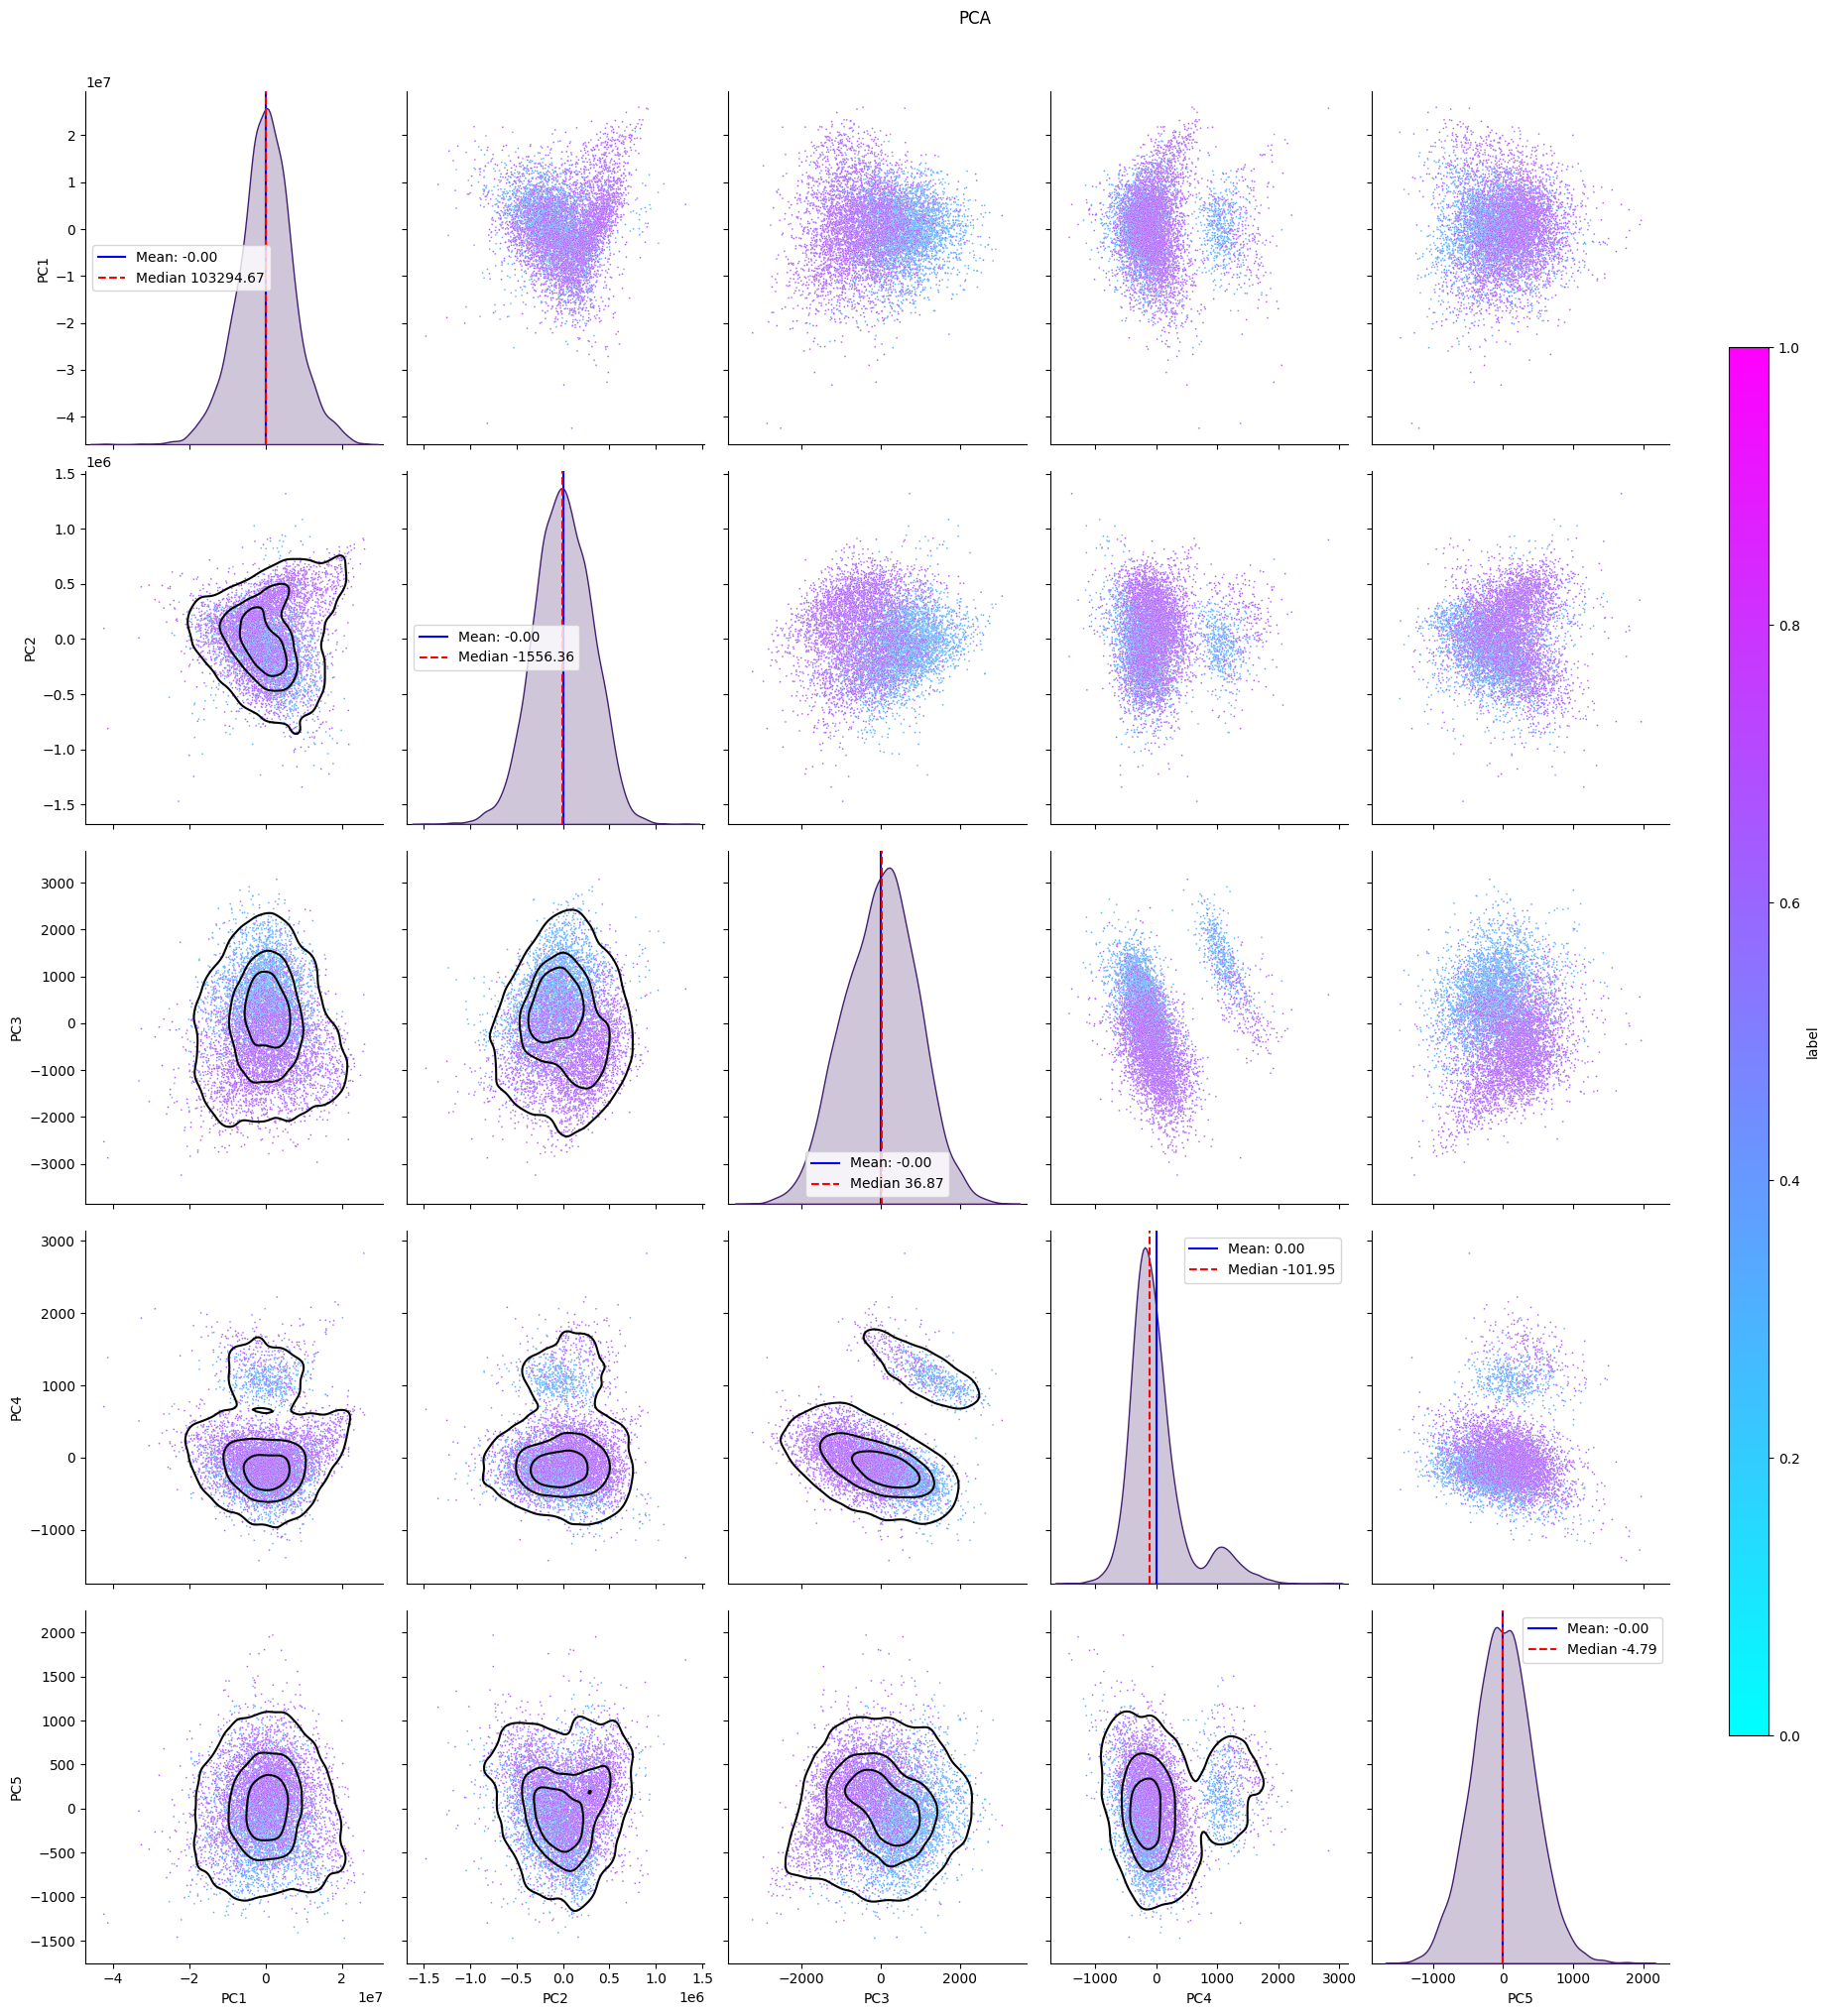

In [18]:
pairplot(
    data=dim_red(df, method="pca", n_components=5),
    title="PCA",
    hue=target,
    height=4
)

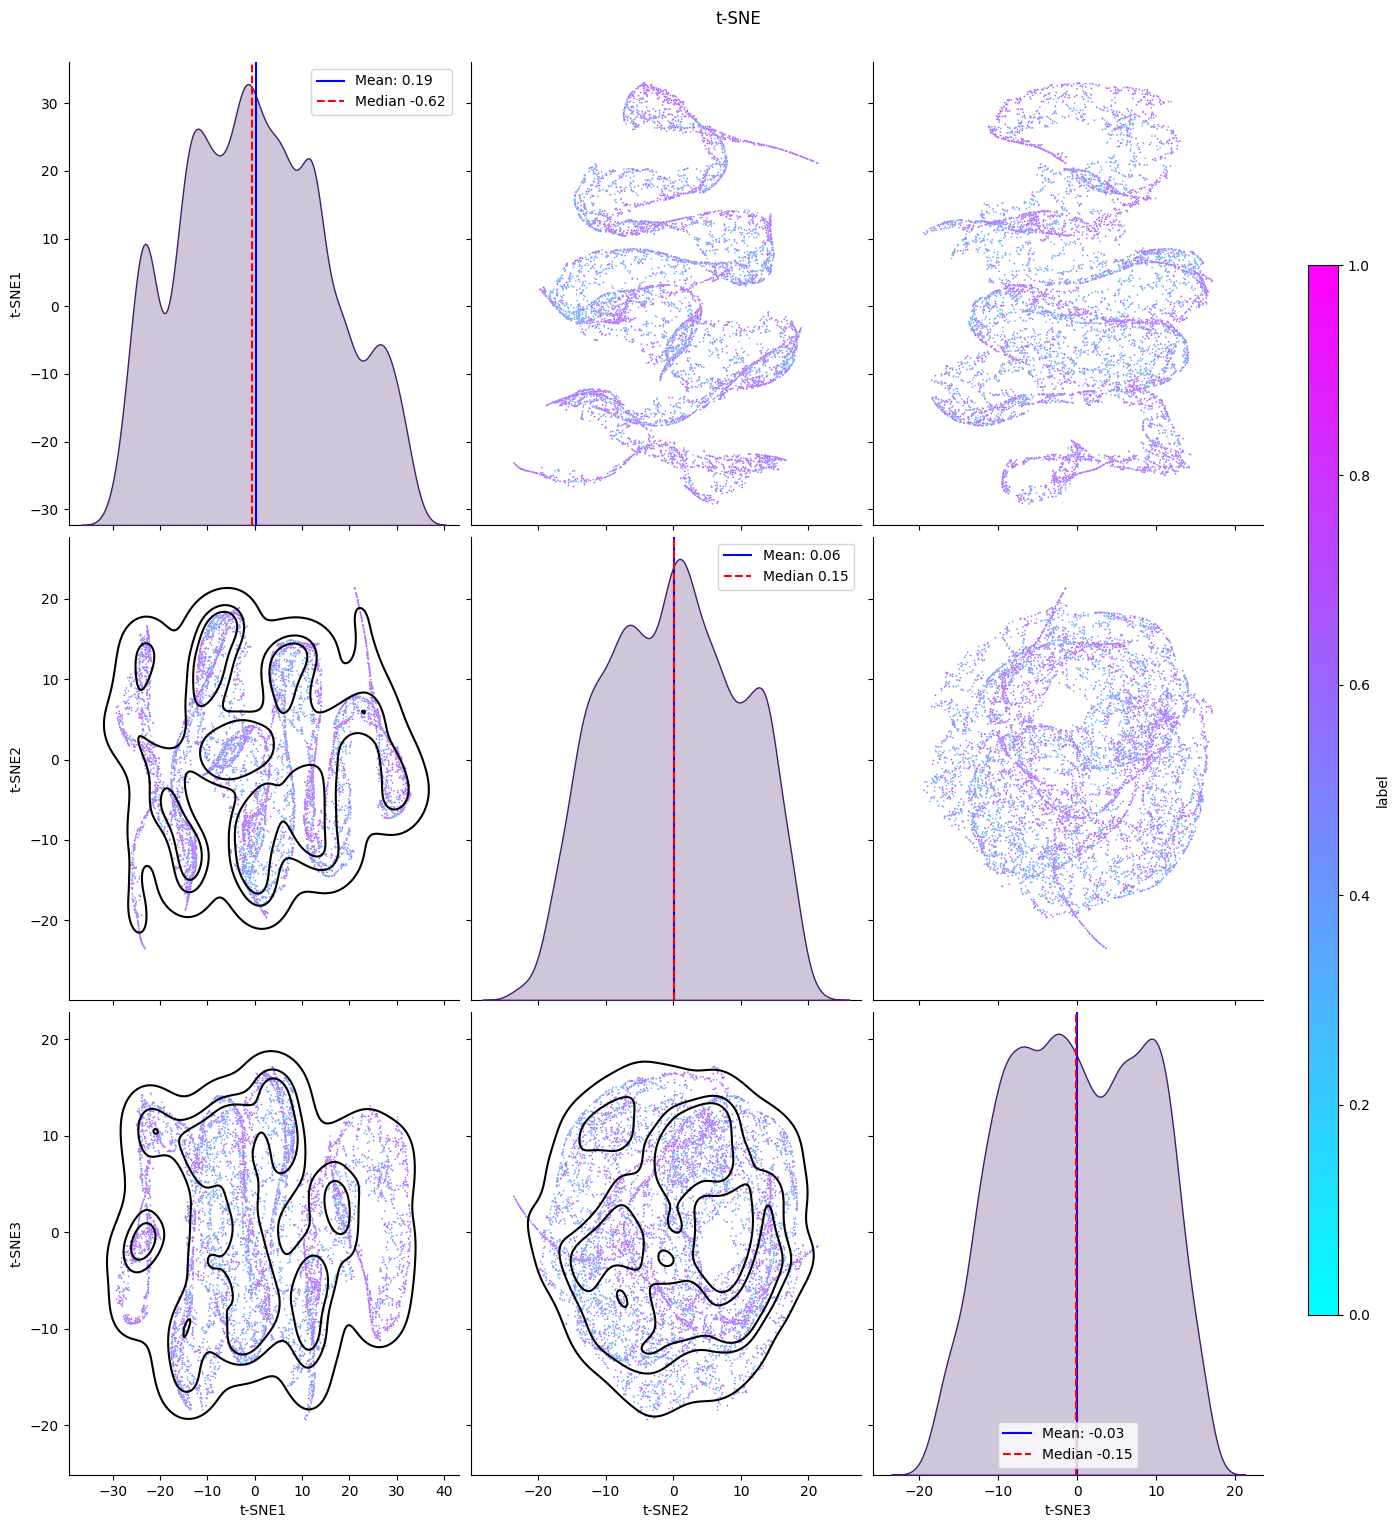

In [19]:
pairplot(
    data=dim_red(df, method="tsne", n_components=3),
    title="t-SNE",
    hue=target
)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



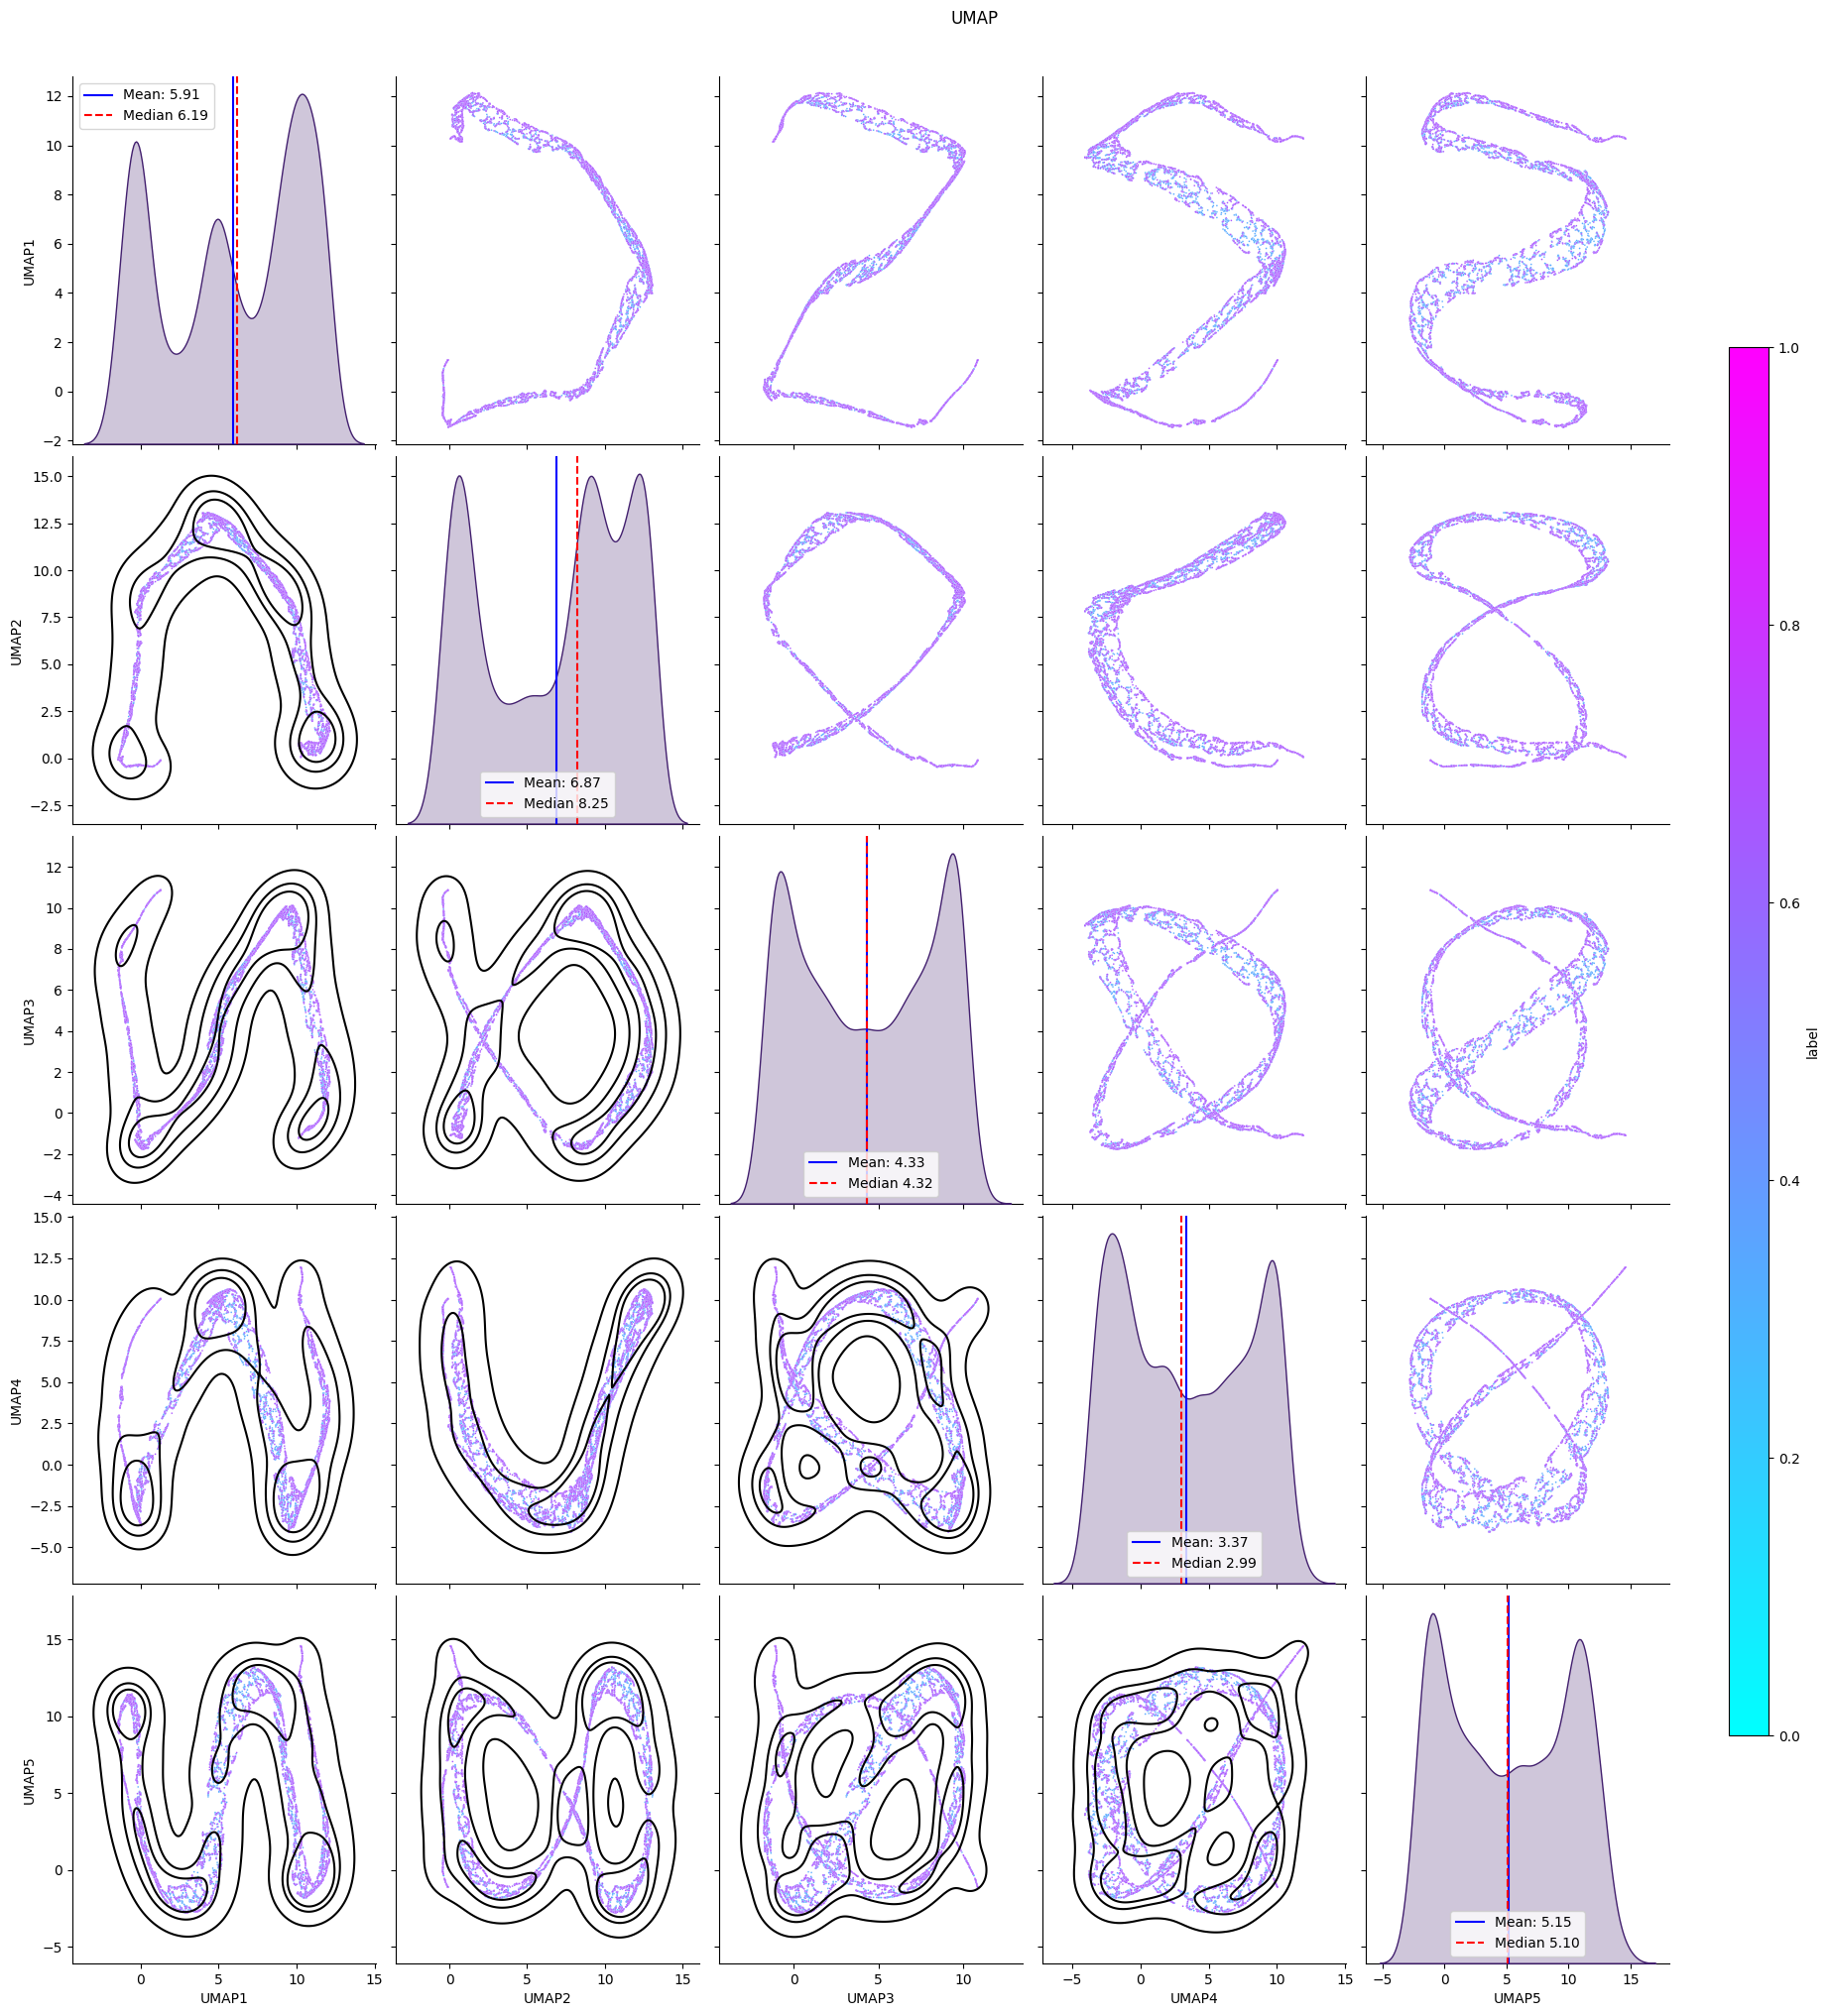

In [20]:
pairplot(
    data=dim_red(df, method="umap", n_components=5),
    title="UMAP",
    hue=target,
    height=4
)

## Conclusion
---
- Some features will be extremely useful in this classification task, as they show high correlation with the target value.
- We could have redundant information based on the intra-feature correlations.
- Dimensionality reduction doesn't seem to separate the two classes that well.
- A good approach is to use `mRMR` to select the relevant features in the next step of ML, which will lead in the minimization of redundancy and the maximization of relevance for our feature set ([classical_ml.ipynb](classical_ml.ipynb)).